In [1]:
import pandas as pd
import time
from datetime import datetime, timedelta
import numpy as np; np.random.seed(0)
import warnings
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_theme()
import datetime
from datetime import datetime
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns





In [2]:
df = pd.read_csv('main_dataframe.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2500 non-null   int64  
 1   Date                   2500 non-null   object 
 2   NVDA Open              2500 non-null   float64
 3   NVDA High              2500 non-null   float64
 4   NVDA Low               2500 non-null   float64
 5   NVDA Close             2500 non-null   float64
 6   NVDA Volume            2500 non-null   int64  
 7   NVDA Daily change      2500 non-null   float64
 8   NVDA Daily change Max  2500 non-null   float64
 9   AAPL Open              2500 non-null   float64
 10  AAPL High              2500 non-null   float64
 11  AAPL Low               2500 non-null   float64
 12  AAPL Close             2500 non-null   float64
 13  AAPL Volume            2500 non-null   int64  
 14  AAPL Daily change      2500 non-null   float64
 15  AAPL

In [3]:
df.head()

,Unnamed: 0,Date,NVDA Open,NVDA High,NVDA Low,NVDA Close,NVDA Volume,NVDA Daily change,NVDA Daily change Max,AAPL Open,...,MSFT Volume,MSFT Daily change,MSFT Daily change Max,INTC Open,INTC High,INTC Low,INTC Close,INTC Volume,INTC Daily change,INTC Daily change Max
0,0,"Jun 24, 2022",165.00,171.40,163.10,171.26,47166300,3.793939,5.088903,139.90,...,33900700,2.249723,2.391869,37.85,38.64,37.74,38.61,38152100,2.007926,2.384738
1,1,"Jun 23, 2022",165.19,165.85,158.53,162.25,46368000,-1.779769,4.617423,136.82,...,25861400,1.287319,2.263139,37.61,37.62,36.91,37.41,30163000,-0.531773,1.923598
2,2,"Jun 22, 2022",162.26,166.62,161.80,163.60,43713500,0.825835,2.978986,134.79,...,25939900,0.492278,2.715980,37.33,37.77,37.22,37.38,32571000,0.133941,1.477700
3,3,"Jun 21, 2022",164.75,170.08,164.07,165.66,48308900,0.552352,3.663071,133.42,...,29928300,1.390554,2.100116,37.36,38.03,37.33,37.73,34004900,0.990364,1.875167
4,4,"Jun 17, 2022",156.48,159.95,153.28,158.80,62905700,1.482618,4.351514,130.07,...,42800400,1.205558,2.651313,37.48,38.12,36.60,36.97,71235800,-1.360726,4.153005


In [4]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [5]:
df.head()

,Date,NVDA Open,NVDA High,NVDA Low,NVDA Close,NVDA Volume,NVDA Daily change,NVDA Daily change Max,AAPL Open,AAPL High,...,MSFT Volume,MSFT Daily change,MSFT Daily change Max,INTC Open,INTC High,INTC Low,INTC Close,INTC Volume,INTC Daily change,INTC Daily change Max
0,"Jun 24, 2022",165.00,171.40,163.10,171.26,47166300,3.793939,5.088903,139.90,141.91,...,33900700,2.249723,2.391869,37.85,38.64,37.74,38.61,38152100,2.007926,2.384738
1,"Jun 23, 2022",165.19,165.85,158.53,162.25,46368000,-1.779769,4.617423,136.82,138.59,...,25861400,1.287319,2.263139,37.61,37.62,36.91,37.41,30163000,-0.531773,1.923598
2,"Jun 22, 2022",162.26,166.62,161.80,163.60,43713500,0.825835,2.978986,134.79,137.76,...,25939900,0.492278,2.715980,37.33,37.77,37.22,37.38,32571000,0.133941,1.477700
3,"Jun 21, 2022",164.75,170.08,164.07,165.66,48308900,0.552352,3.663071,133.42,137.06,...,29928300,1.390554,2.100116,37.36,38.03,37.33,37.73,34004900,0.990364,1.875167
4,"Jun 17, 2022",156.48,159.95,153.28,158.80,62905700,1.482618,4.351514,130.07,133.08,...,42800400,1.205558,2.651313,37.48,38.12,36.60,36.97,71235800,-1.360726,4.153005


In [6]:
df.describe(include='all')

,Date,NVDA Open,NVDA High,NVDA Low,NVDA Close,NVDA Volume,NVDA Daily change,NVDA Daily change Max,AAPL Open,AAPL High,...,MSFT Volume,MSFT Daily change,MSFT Daily change Max,INTC Open,INTC High,INTC Low,INTC Close,INTC Volume,INTC Daily change,INTC Daily change Max
count,2500,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000,2500.000000,2500.000000,...,2.500000e+03,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000
unique,2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,"Jun 24, 2022",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,57.271320,58.307552,56.133560,57.250304,4.409070e+07,0.059422,3.091728,55.981524,56.594948,...,3.319115e+07,0.046582,1.861878,40.32352,40.758612,39.900792,40.337468,2.999822e+07,0.048711,2.066517
std,NaN,71.823387,73.301537,70.115531,71.722822,2.589456e+07,2.152476,1.919840,44.903002,45.479055,...,1.737449e+07,1.249560,1.126032,12.22360,12.407562,12.034411,12.219947,1.534594e+07,1.390349,1.252521
min,NaN,2.870000,2.910000,2.790000,2.850000,4.564400e+06,-10.580964,0.723327,13.860000,14.270000,...,7.425600e+06,-5.924658,0.375509,19.52000,19.550000,19.230000,19.360000,5.893800e+06,-6.818865,0.476417
25%,NaN,5.030000,5.060000,4.950000,5.030000,2.755700e+07,-1.013199,1.832740,24.860000,25.155000,...,2.273215e+07,-0.599245,1.162584,30.88500,31.245000,30.650000,30.970000,2.043538e+07,-0.687378,1.310396
50%,NaN,35.875000,36.405000,35.125000,35.905000,3.768180e+07,0.000000,2.537137,37.820000,38.340000,...,2.903635e+07,0.058761,1.564759,36.90500,37.195000,36.615000,36.945000,2.645245e+07,0.046344,1.765001
75%,NaN,65.017500,65.910000,63.987500,65.292500,5.293340e+07,1.173883,3.733314,66.500000,67.170000,...,3.807275e+07,0.749577,2.219039,50.55500,51.222500,49.972500,50.627500,3.475612e+07,0.767120,2.460873


In [7]:
df.dropna(inplace = True, axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   2500 non-null   object 
 1   NVDA Open              2500 non-null   float64
 2   NVDA High              2500 non-null   float64
 3   NVDA Low               2500 non-null   float64
 4   NVDA Close             2500 non-null   float64
 5   NVDA Volume            2500 non-null   int64  
 6   NVDA Daily change      2500 non-null   float64
 7   NVDA Daily change Max  2500 non-null   float64
 8   AAPL Open              2500 non-null   float64
 9   AAPL High              2500 non-null   float64
 10  AAPL Low               2500 non-null   float64
 11  AAPL Close             2500 non-null   float64
 12  AAPL Volume            2500 non-null   int64  
 13  AAPL Daily change      2500 non-null   float64
 14  AAPL Daily change Max  2500 non-null   float64
 15  TSLA

In [8]:
df.to_csv('main_dataframe.csv')

In [9]:
df['Date'] = pd.to_datetime(df['Date']).copy()
df["Date"]= pd.to_datetime(df.Date,format="%Y-%m-%d").copy()
#df['Date'] = pd.to_numeric(pd.to_datetime(df['Date'])).copy()
i = 0
df["Day"] = 0 
while i  < 2500:
    temp = pd.Timestamp(df["Date"][i])
    df['Day'][i] = temp.dayofweek
    i=i+1

C:\Users\vovik\AppData\Local\Temp/ipykernel_4252/314205087.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'][i] = temp.dayofweek


In [10]:
df.head()

,Date,NVDA Open,NVDA High,NVDA Low,NVDA Close,NVDA Volume,NVDA Daily change,NVDA Daily change Max,AAPL Open,AAPL High,...,MSFT Daily change,MSFT Daily change Max,INTC Open,INTC High,INTC Low,INTC Close,INTC Volume,INTC Daily change,INTC Daily change Max,Day
0,2022-06-24,165.00,171.40,163.10,171.26,47166300,3.793939,5.088903,139.90,141.91,...,2.249723,2.391869,37.85,38.64,37.74,38.61,38152100,2.007926,2.384738,4
1,2022-06-23,165.19,165.85,158.53,162.25,46368000,-1.779769,4.617423,136.82,138.59,...,1.287319,2.263139,37.61,37.62,36.91,37.41,30163000,-0.531773,1.923598,3
2,2022-06-22,162.26,166.62,161.80,163.60,43713500,0.825835,2.978986,134.79,137.76,...,0.492278,2.715980,37.33,37.77,37.22,37.38,32571000,0.133941,1.477700,2
3,2022-06-21,164.75,170.08,164.07,165.66,48308900,0.552352,3.663071,133.42,137.06,...,1.390554,2.100116,37.36,38.03,37.33,37.73,34004900,0.990364,1.875167,1
4,2022-06-17,156.48,159.95,153.28,158.80,62905700,1.482618,4.351514,130.07,133.08,...,1.205558,2.651313,37.48,38.12,36.60,36.97,71235800,-1.360726,4.153005,4


C:\Users\vovik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Day', ylabel='TSLA Daily change'>

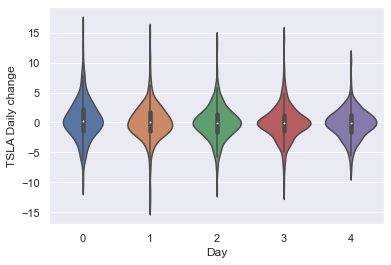

In [11]:
tdf = pd.DataFrame(df, columns = ['Day','TSLA Daily change'])
sns.violinplot(tdf.Day , tdf['TSLA Daily change'])

C:\Users\vovik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Day', ylabel='NVDA Daily change'>

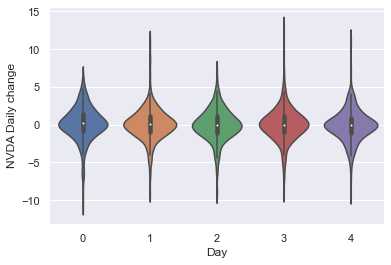

In [12]:
tdf = pd.DataFrame(df, columns = ['Day','NVDA Daily change'])
sns.violinplot(tdf.Day , tdf['NVDA Daily change'])

C:\Users\vovik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Day', ylabel='TSLA Daily change'>

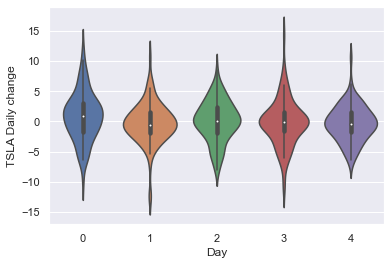

In [13]:
tdf = pd.DataFrame(df, columns = ['Day','TSLA Daily change'])
tdf.drop(tdf.index[500:2548], inplace=True) 
sns.violinplot(tdf.Day , tdf['TSLA Daily change'])

C:\Users\vovik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Day', ylabel='NVDA Daily change'>

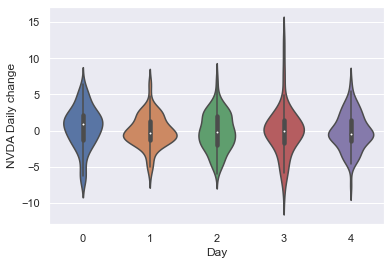

In [14]:
tdf = pd.DataFrame(df, columns = ['Day','NVDA Daily change'])
tdf.drop(tdf.index[500:2548], inplace=True) 
sns.violinplot(tdf.Day , tdf['NVDA Daily change'])

<AxesSubplot:>

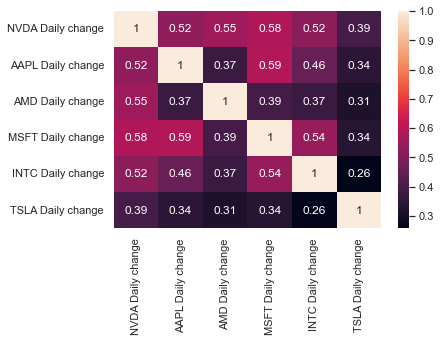

In [15]:
tdf = pd.DataFrame(df, columns = ['NVDA Daily change','AAPL Daily change','AMD Daily change','MSFT Daily change','INTC Daily change','TSLA Daily change'])

#tdf.drop(tdf.index[300:2548], inplace=True)

#tdf.tail()


sns.heatmap(tdf.corr(), annot=True)

<AxesSubplot:>

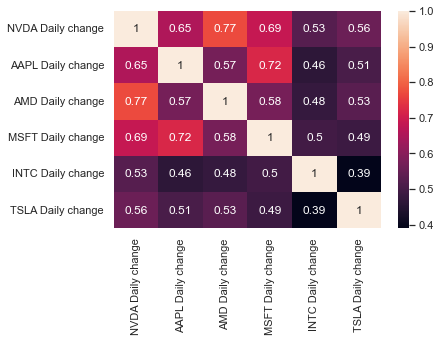

In [16]:
tdf = pd.DataFrame(df, columns = ['NVDA Daily change','AAPL Daily change','AMD Daily change','MSFT Daily change','INTC Daily change','TSLA Daily change'])

tdf.drop(tdf.index[500:2548], inplace=True)

#tdf.tail()


sns.heatmap(tdf.corr(), annot=True)

In [17]:
tdf.head()

,NVDA Daily change,AAPL Daily change,AMD Daily change,MSFT Daily change,INTC Daily change,TSLA Daily change
0,3.793939,1.258041,4.212542,2.249723,2.007926,3.468508
1,-1.779769,1.059787,-2.241461,1.287319,-0.531773,-1.192344
2,0.825835,0.415461,-0.770142,0.492278,0.133941,0.675186
3,0.552352,1.836306,-0.451467,1.390554,0.990364,5.535685
4,1.482618,1.145537,-0.754350,1.205558,-1.360726,1.558644


<AxesSubplot:>

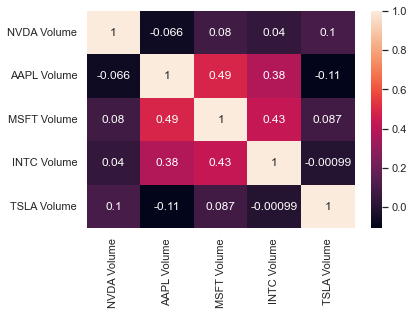

In [18]:
tdf = pd.DataFrame(df, columns = ['NVDA Volume','AAPL Volume','AMD Volume','MSFT Volume','INTC Volume','TSLA Volume'])
sns.heatmap(tdf.corr(), annot=True)


<AxesSubplot:>

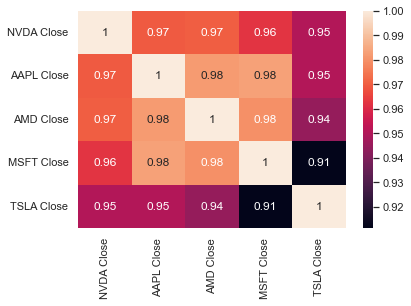

In [19]:
tdf = pd.DataFrame(df, columns = ['NVDA Close','AAPL Close','AMD Close','MSFT Close','TSLA Close'])
sns.heatmap(tdf.corr(), annot=True)

<AxesSubplot:>

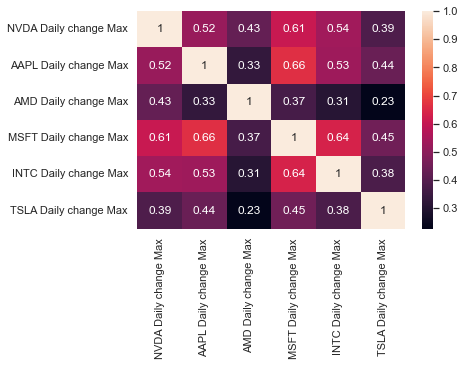

In [20]:
tdf = pd.DataFrame(df, columns = ['NVDA Daily change Max','AAPL Daily change Max','AMD Daily change Max','MSFT Daily change Max','INTC Daily change Max','TSLA Daily change Max'])
sns.heatmap(tdf.corr(), annot=True)

<AxesSubplot:>

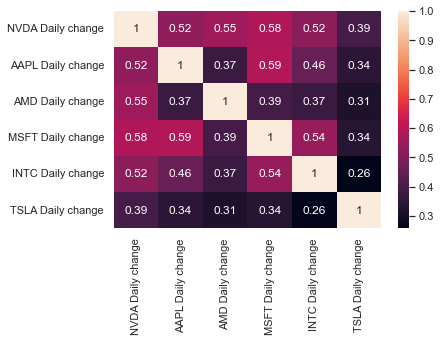

In [21]:
tdf = pd.DataFrame(df, columns = ['NVDA Daily change','AAPL Daily change','AMD Daily change','MSFT Daily change','INTC Daily change','TSLA Daily change'])
sns.heatmap(tdf.corr(), annot=True)

<AxesSubplot:>

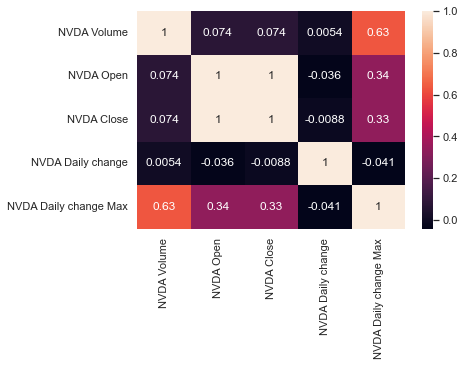

In [22]:
tdf = pd.DataFrame(df, columns = ['NVDA Volume','NVDA Open','NVDA Close','NVDA Daily change','NVDA Daily change Max'])
sns.heatmap(tdf.corr(), annot=True)

<AxesSubplot:>

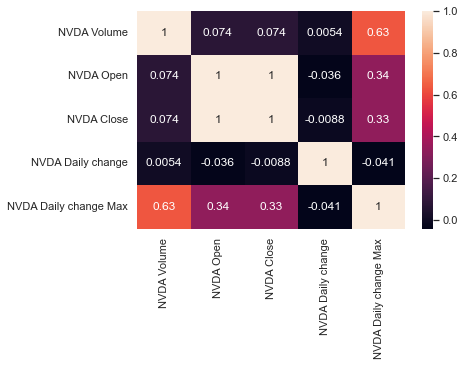

In [23]:
tdf = pd.DataFrame(df, columns = ['NVDA Volume','NVDA Open','NVDA Close','NVDA Daily change','NVDA Daily change Max'])
sns.heatmap(tdf.corr(), annot=True)